# AFM Metallic Chain

## Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import junpy as jp
from junpy.factory import tightbinding
%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.rc = {'font.size': 12}

## Build Device

In [2]:
# hopping energy
t = np.array([[-1, 0], [0, -1]])

# on-site energy
e0 = np.array([[0, 0], [0, 0]])

# spin-splitting
ez = np.array([[-1, 0], [ 0, +1]])

# lattice vectors
a1 = [1,0,0]
a2 = [0,1,0]
a3 = [0,0,2]

# create center
builder = tightbinding.DeviceBuilder([a1, a2, a3], 'CollinearSpin')
builder.set_translationSymmetry(False, False, False)
builder.add_site('s1', (0,0,0), e0 + ez)
builder.add_site('s2', (0,0,1), e0 - ez)
builder.add_hopping('s1', ((0,0,0), 's2'), t)

# create lead
lead = tightbinding.DeviceBuilder([a1, a2, a3], 'CollinearSpin')
lead.set_translationSymmetry(False, False, True)
lead.add_site('f1', (0,0,0), e0 + ez)
lead.add_site('f2', (0,0,1), e0 - ez)
lead.add_hopping('f1', ((0,0,0), 'f2'), t)
lead.add_hopping('f2', ((0,0,1), 'f1'), t)

# attach left lead
builder.attach_lead('left', lead, -3)
builder.add_lead_coupling('s1', 'left', (0,0,0), 'f2', t)

# attach right lead
builder.attach_lead('right', lead, +3)
builder.add_lead_coupling('s2', 'right', (0,0,0), 'f1', t)

device = builder.create_device()

## Calculate Density of States

In [3]:
calcr_dos = jp.DensityOfStates(
    device=device,
    energies=np.linspace(-3, 3, 101),
    etaSigma=0.01)
jp.run(calcr_dos, savefile=False)

JunPy version---------------------------: 0.15.0.post29+ga5b3260
Parallelization information
    BLAS Vendor-----------------------------: MKL
    Total number of MPI processes-----------: 1
    OMP_NUM_THREADS-------------------------: 1
    MKL_NUM_THREADS-------------------------: unset
    OPENBLAS_NUM_THREADS--------------------: unset
Calculating density of states... (2024-08-14 21:11:03)
    Device information
        bias (mu2-mu1)--------------------------: 0
        central.numberOfSites-------------------: 2
        central.spinType------------------------: SpinType.CollinearSpin
        lead1.numberOfSites---------------------: 2
        lead1.spinType--------------------------: SpinType.CollinearSpin
        lead1.direction-------------------------: -3
        lead1.temperature-----------------------: 0
        lead1.chemicalPotential-----------------: 0
        lead2.numberOfSites---------------------: 2
        lead2.spinType--------------------------: SpinType.Collinear

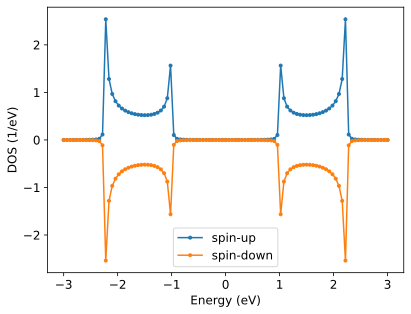

In [4]:
# shape: (#kpoints, #energies, #spin)
dos = calcr_dos.densityOfStates(spin='diag')

plt.plot(calcr_dos.energies,  dos[0,:,0], '.-', label='spin-up')
plt.plot(calcr_dos.energies, -dos[0,:,1], '.-', label='spin-down')
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (1/eV)')
plt.legend()
plt.show()

## Calculate Transmission

In [5]:
calcr_trans = jp.Transmission(
    device=device,
    energies=np.linspace(-3, 3, 101),
    etaSigma=1e-4)
jp.run(calcr_trans, savefile=False)

JunPy version---------------------------: 0.15.0.post29+ga5b3260
Parallelization information
    BLAS Vendor-----------------------------: MKL
    Total number of MPI processes-----------: 1
    OMP_NUM_THREADS-------------------------: 1
    MKL_NUM_THREADS-------------------------: unset
    OPENBLAS_NUM_THREADS--------------------: unset
Calculating transmission... (2024-08-14 21:11:23)
    Device information
        bias (mu2-mu1)--------------------------: 0
        central.numberOfSites-------------------: 2
        central.spinType------------------------: SpinType.CollinearSpin
        lead1.numberOfSites---------------------: 2
        lead1.spinType--------------------------: SpinType.CollinearSpin
        lead1.direction-------------------------: -3
        lead1.temperature-----------------------: 0
        lead1.chemicalPotential-----------------: 0
        lead2.numberOfSites---------------------: 2
        lead2.spinType--------------------------: SpinType.CollinearSpin


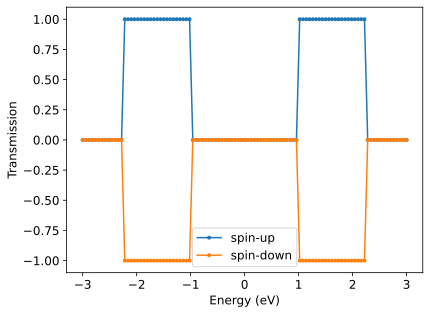

In [6]:
# shape: (#kpoints, #energies, #spin)
trans = calcr_trans.transmission(spin='diag')
plt.plot(calcr_trans.energies,  trans[0,:,0], '.-', label='spin-up')
plt.plot(calcr_trans.energies, -trans[0,:,1], '.-', label='spin-down')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.legend()
plt.show()